# US Medical Insurance Costs

In this notebook, we shall explore what are the most contributing factors to medical insurance costs in the US. In this first step, we perform an initial visualization of the elements in the dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("insurance.csv").dropna()
df = df[df["charges"] > 0]
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Of these variables, three are categorical and three are numeric. Let's explore categorical variables first. In order to make sure that we're not making unfair assumptions on the data, let's see how the categories are distributed:

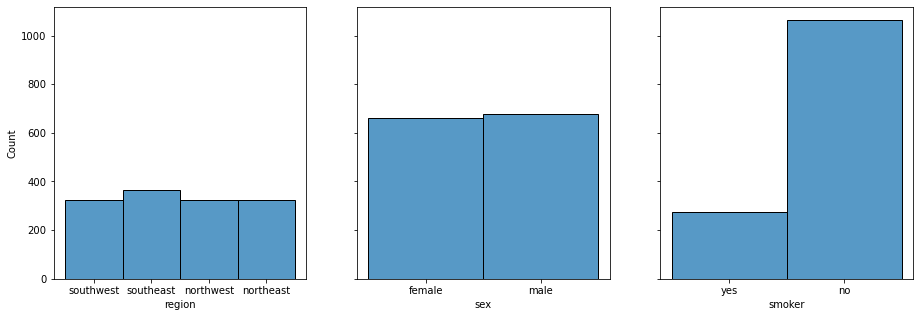

In [2]:
fig, axes = plt.subplots(1, 3, figsize=(15.4,5), sharey=True)
sns.histplot(df, x="region", multiple="dodge", ax=axes[0]);
sns.histplot(df, x="sex", multiple="dodge", ax=axes[1]);
sns.histplot(df, x="smoker", multiple="dodge", ax=axes[2]);

There are approximately the same number of observations for each category of both region and sex, but "smoker" is skewed to the non-smoking side. This information will prove valuable when performing analysis on them later on.

The three main questions we wish to answer are:
- Are women more likely to pay higher charges, or viceversa? If so, how much more?
- Do smokers pay higher insurance charges? If so, how much more?
- Are insurance costs evenly distributed across the US? If not, what variables may be affecting this?

### Insurance costs and gender equality
Let us explore how sex is related to insurance costs. For this, we will produce a couple of  violin plots. Keep in mind that this dataset sadly does not include data about nonbinary individuals.

             charges
sex                 
female  12569.578844
male    13956.751178


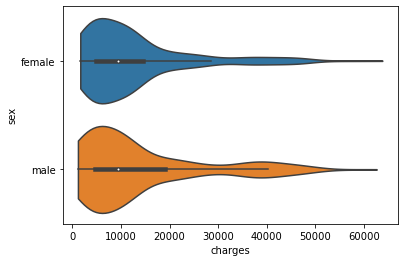

In [3]:
sns.violinplot(x=df["charges"], y=df["sex"], scale="count", cut=0)
means = df[["sex", "charges"]].groupby("sex").mean()
print(means)

In all, it appears that men pay, on average, around 1400 more dollars for their insurances. A contributing factor to this could be the fact that [men are more involved in high-risk occupations than women](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4880472/). Even though the dataset does not contain information about employment status, it is safe to assume at least that people who pay for health insurance are also employed. On the other hand, it is important to point out that [a gender pay gap exists in the United States](https://www.payscale.com/data/gender-pay-gap). Further exploration could be done in these fields to answers questions such as:
- Does having a high-risk job makes you more likely to pay more health insurance?


### That pack of smokes could be costlier than you think
We will now observe the effect that smoking has on insurance costs. Given that the dataset contains more observations for non-smokers, we will use a boxplot instead of a violin plot.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

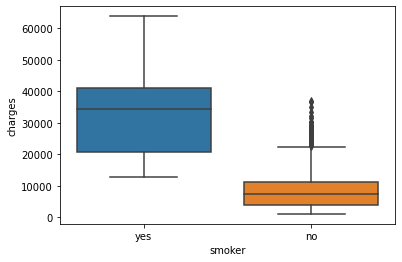

In [4]:
sns.boxplot(x=df["smoker"], y=df["charges"])

We can see a clear relationship between smoking and paying higher insurance costs. Even though some non-smokers indeed pay as much as smokers, it is safe to assume that on average a smoker will pay more. 

### Where you come from might tell how much you pay
We will now investigate the geographic distribution of costs. For this, we will use a violin plot and calculate means separately.

                charges
region                 
northeast  13406.384516
northwest  12417.575374
southeast  14735.411438
southwest  12346.937377


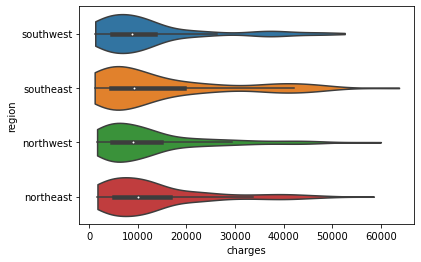

In [6]:
sns.violinplot(x=df["charges"], y=df["region"], scale="count", cut=0)
means = df[["region", "charges"]].groupby("region").mean()
print(means)

People in the west pay less in general, while people in the southeast have the highest average charges. More explanation on this could be addressed. An idea that comes to mind is crime/violence rates across the US. 

### How do numeric variables correlate with total charge?
Finally, let us investigate how age, BMI and number of children might influence the total insurance costs a person has to pay. Since these are numeric variables, it is easier to analyze them using a correlation Matrix. Kendall correlation will be used since it cannot be assumed that insurance costs vary linearly with either of the variables.

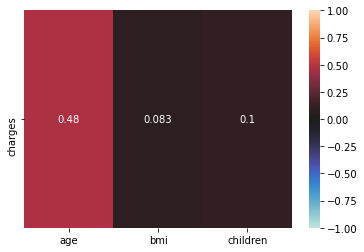

In [8]:
corr_mtx = df.corr(method="kendall")
sns.heatmap(corr_mtx.iloc[-1:,:-1], vmax=1.0, vmin=-1.0, center=0, annot=True);

Out of all variables and unsurprisingly, age is the most correlated to insurance costs. We shall now plot the datapoints in a scatterplot to see how this correlation works.

In [ ]:
sns.histplot(df, x="region", hue="smoker", multiple="dodge")